In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(most_recent_date)

2017-08-23


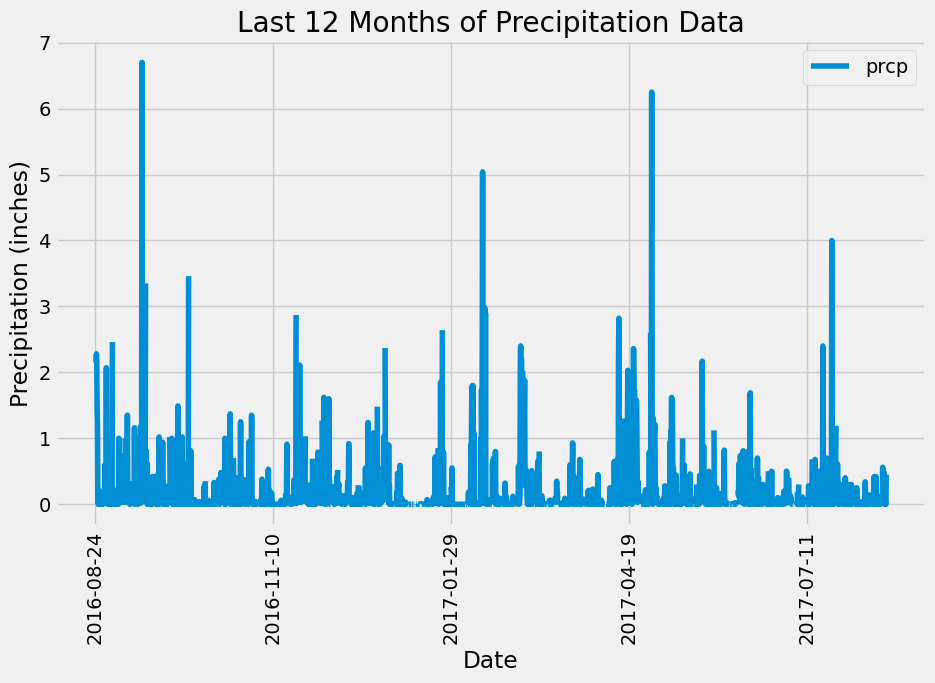

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date_dt = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date_dt - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
twelve_mths_prcp = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date>=one_year_ago)\
    .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(twelve_mths_prcp, columns=['date', 'prcp'])
df.set_index('date', inplace=True) 

# Sort the dataframe by date
df.sort_values(by='date', inplace=True)

#print dataframe

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10,6), rot=90, legend=False)
plt.title("Last 12 Months of Precipitation Data")
plt.legend(loc='upper right')
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df.describe()
summary_stats

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
print(total_stations)

9


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.tobs))\
                                .group_by(Measurement.station)\
                                .order_by(func.count(Measurement.tobs).desc())\
                                .all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(most_active_station==Measurement.station).all()

[(54.0, 85.0, 71.66378066378067)]

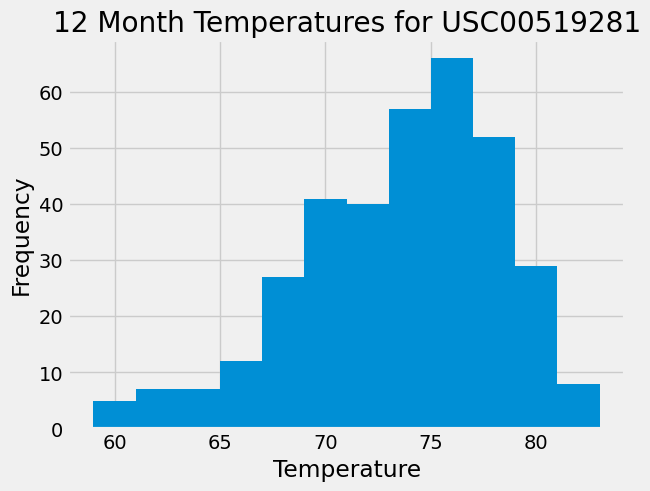

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_last12months = session.query(Measurement.tobs)\
                .filter(Measurement.station==most_active_station)\
                .filter(Measurement.date>=one_year_ago).all()

df = pd.DataFrame(MAS_last12months)
df.plot.hist(bins=12,legend=False)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title(f"12 Month Temperatures for {most_active_station}")
plt.show()

# Close Session

In [21]:
# Close Session
session.close()